In [932]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from warnings import filterwarnings
filterwarnings('ignore')

## READ DATASET

In [933]:
data=pd.read_excel('zomato.xlsx')  

In [934]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [935]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [936]:
data.describe()

,votes,approx_cost(for two people)
count,51717.000000,51371.000000
mean,283.697527,555.431566
std,803.838853,438.850728
min,0.000000,40.000000
25%,7.000000,300.000000
50%,41.000000,400.000000
75%,198.000000,650.000000
max,16832.000000,6000.000000


## DATA CLEANING 

In [937]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## DROP COLUMNS 

In [938]:
data.drop(['url', 'phone'], axis=1, inplace=True)

## ONLINE_ORDER

In [939]:
data['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [940]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [941]:
online_offline ={
    'Yes': 1, 'No': 0
}

In [942]:
data['online_order']=data['online_order'].map(online_offline)

## BOOK_TABLE

In [943]:
data['book_table']

0        Yes
1         No
2         No
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715    Yes
51716     No
Name: book_table, Length: 51717, dtype: object

In [944]:
data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [945]:
book_table={
    'Yes': 1, 'No': 0
}

In [946]:
data['book_table']=data['book_table'].map(book_table)

## RATE

In [947]:
data['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [948]:
data['rate'].unique()   

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [949]:
data['rate']=data['rate'].astype(str)

In [950]:
def split(x):
    return x.split('/')[0]

In [951]:
data['rate']=data['rate'].apply(split)

In [952]:
data['rate'].fillna(0, inplace=True)
data['rate'].replace({'NEW':0}, inplace=True)
data['rate'].replace({'-':0}, inplace=True)

In [953]:
data['rate']=data['rate'].astype(float)

In [954]:
df=data['rate'].fillna(data['rate'].mean())

In [955]:
data['rate out of 5']=df.round(1)

In [956]:
data.drop(['rate'], axis=1, inplace=True)

## VOTES

In [957]:
data['votes'].dtype

dtype('int64')

In [958]:
data['votes'].astype(float)

0        775.0
1        787.0
2        918.0
3         88.0
4        166.0
         ...  
51712     27.0
51713      0.0
51714      0.0
51715    236.0
51716     13.0
Name: votes, Length: 51717, dtype: float64

## LOCATION

In [959]:
data['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [960]:
data.fillna({'location':'other'},  inplace=True)

## REST_TYPE 

In [961]:
data['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51717, dtype: object

In [962]:
data['rest_type'].fillna('other',inplace=True)

## DISH_LIKED

In [963]:
data['dish_liked']

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                                  NaN
51713                                                  NaN
51714                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 51717, dtype: object

In [964]:
data.fillna({'dish_liked':'other'},inplace=True)

## CUISINES

In [965]:
data['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [966]:
data['cuisines'].fillna('other', inplace=True)

## APPROX_COST(FOR TW PEOPLE)

In [967]:
data['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [968]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(str)

In [969]:
data['approx_cost(for two people)'].unique()

array(['800.0', '300.0', '600.0', '700.0', '550.0', '500.0', '450.0',
       '650.0', '400.0', '900.0', '200.0', '750.0', '150.0', '850.0',
       '100.0', '1200.0', '350.0', '250.0', '950.0', '1000.0', '1500.0',
       '1300.0', '199.0', '80.0', '1100.0', '160.0', '1600.0', '230.0',
       '130.0', '50.0', '190.0', '1700.0', 'nan', '1400.0', '180.0',
       '1350.0', '2200.0', '2000.0', '1800.0', '1900.0', '330.0',
       '2500.0', '2100.0', '3000.0', '2800.0', '3400.0', '40.0', '1250.0',
       '3500.0', '4000.0', '2400.0', '2600.0', '120.0', '1450.0', '469.0',
       '70.0', '3200.0', '60.0', '560.0', '240.0', '360.0', '6000.0',
       '1050.0', '2300.0', '4100.0', '5000.0', '3700.0', '1650.0',
       '2700.0', '4500.0', '140.0'], dtype=object)

In [970]:
replace = lambda x: x.replace(',','.')

In [971]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].apply(replace)
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(str)

In [972]:
def sp(x):
    return x.split('.')[0]

In [973]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].apply(sp)

In [974]:
data['approx_cost(for two people)'].replace({'nan':0}, inplace=True)
data['approx_cost(for two people)'].astype(float)

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

## ANALYSIS & VISUALISATION

In [975]:
data

,address,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate out of 5
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,27,Whitefield,Bar,other,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,0,Whitefield,Bar,other,Finger Food,600,[],[],Pubs and bars,Whitefield,3.5
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,0,Whitefield,Bar,other,Finger Food,2000,[],[],Pubs and bars,Whitefield,3.5
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3


## Check Reletion Between All Columns 

In [976]:
corrMatrix=data.corr()

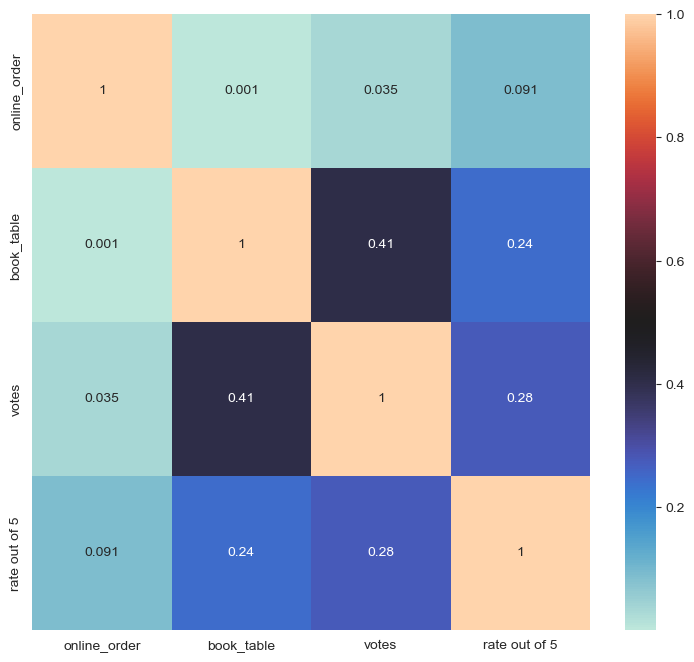

In [977]:
f,ax=plt.subplots(figsize=(9,8))
ax=sns.heatmap(corrMatrix,annot=True,cmap='icefire')

<AxesSubplot:title={'center':'AVERAGE RATING WITH RESPECT TO RESTAURANT'}, xlabel='name'>

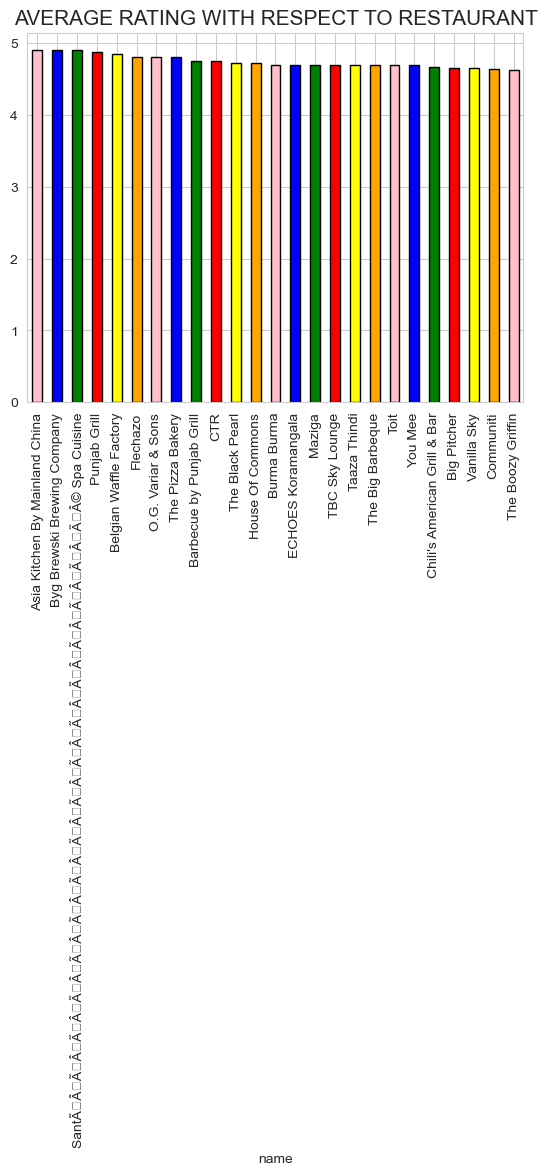

In [978]:
plt.title('AVERAGE RATING WITH RESPECT TO RESTAURANT',fontsize=15)
data.groupby('name')['rate out of 5'].mean().nlargest(25).plot.bar(color=(['pink', 'blue', 'green', 'red', 'yellow', 'orange']), edgecolor='black')

## Online Order

<AxesSubplot:title={'center':'RESTUARANTS ACCEPT ONLINE ORDER'}, xlabel='online_order', ylabel='count'>

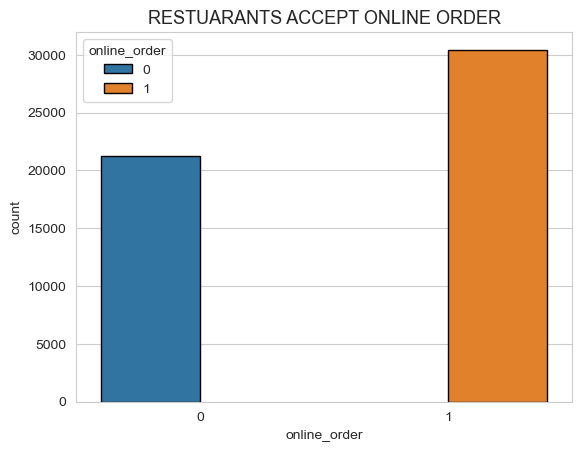

In [979]:
plt.title('RESTUARANTS ACCEPT ONLINE ORDER', fontsize=13)
sns.countplot(x='online_order', data=data, edgecolor='black', hue='online_order')

## Accept Book Table 

<AxesSubplot:title={'center':'TABLE BOOKING'}, xlabel='book_table', ylabel='count'>

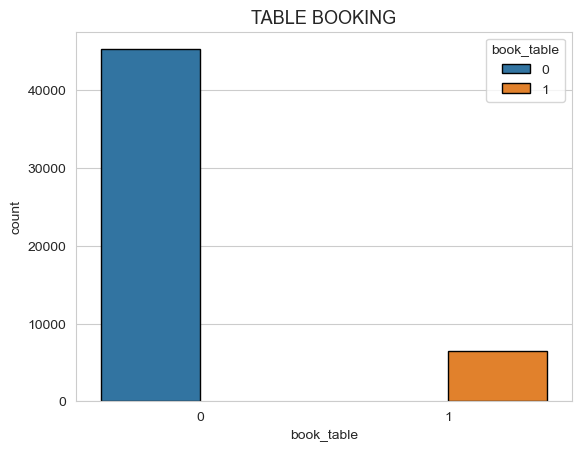

In [980]:
plt.title('TABLE BOOKING', fontsize=13)
sns.countplot(x='book_table', data=data, edgecolor='black', hue='book_table')

## Online Order vs Rate 

Text(0.5, 1.0, 'Online Order vs Rate')

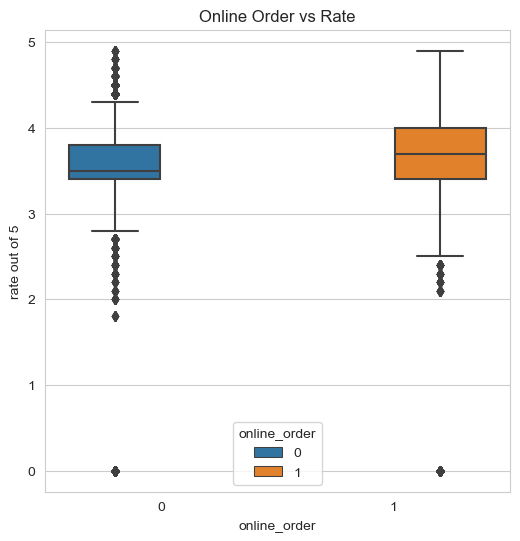

In [981]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate out of 5', hue='online_order', data=data)
plt.title('Online Order vs Rate')

## Online Order Vs Rate Compared With Table Booking 

Text(0.5, 1.0, 'Online Order vs Rate Compared with Table_book')

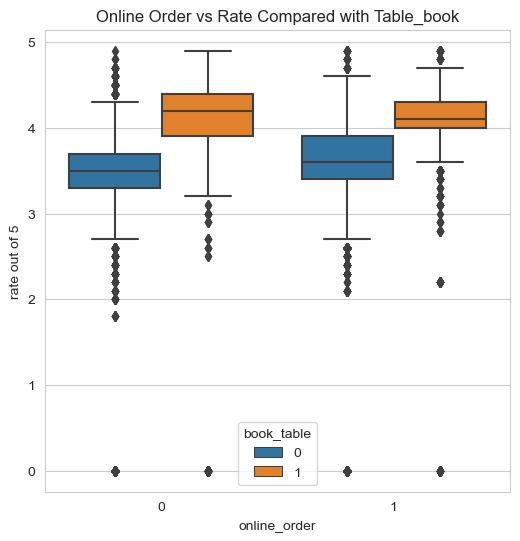

In [982]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate out of 5', data=data, hue='book_table')
plt.title('Online Order vs Rate Compared with Table_book')

## Maximum Rating Are Which Portion 

<AxesSubplot:xlabel='rate out of 5', ylabel='Density'>

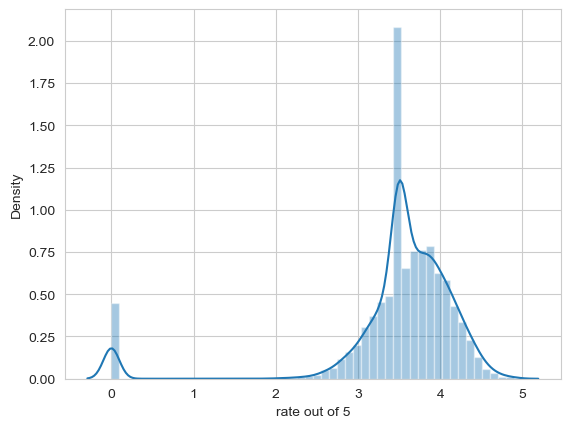

In [983]:
sns.set_style(style='whitegrid')
sns.distplot(data['rate out of 5'])

## Rate Vs Table Booking

<AxesSubplot:xlabel='rate out of 5', ylabel='count'>

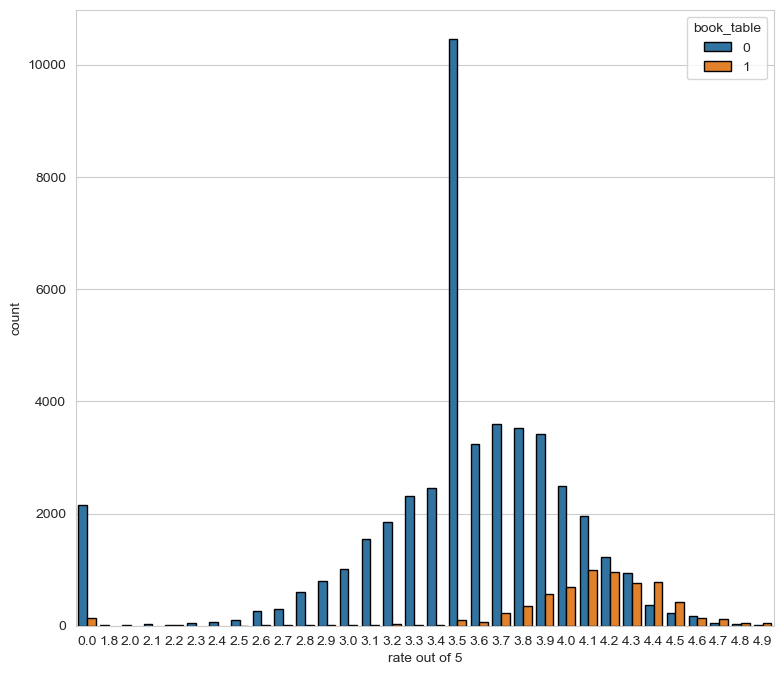

In [984]:
plt.figure(figsize=(9,8))
sns.countplot(x='rate out of 5', hue='book_table', edgecolor='black', data=data)

## Rate Vs Online Order 

<AxesSubplot:xlabel='rate out of 5', ylabel='count'>

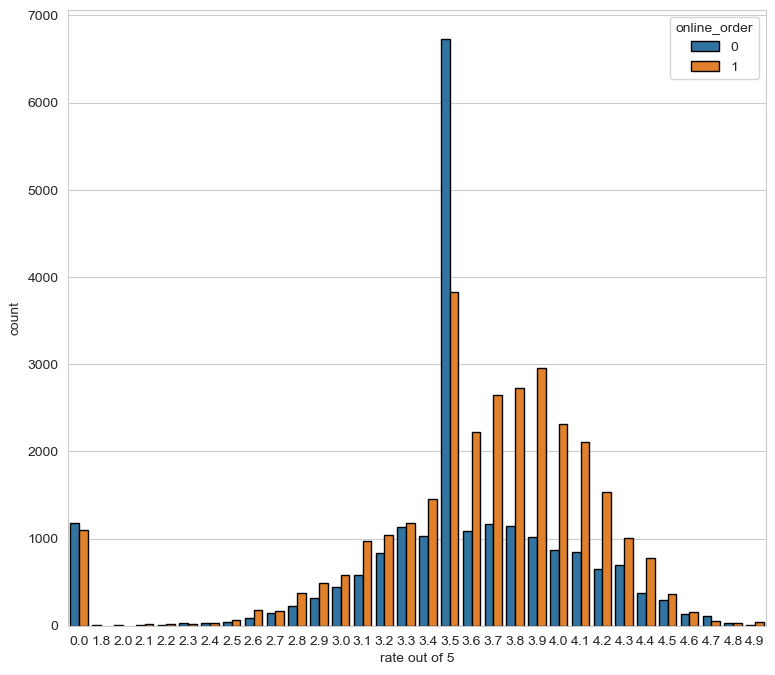

In [985]:
plt.figure(figsize=(9,8))
sns.countplot(x='rate out of 5', hue='online_order', data=data, edgecolor='black')

<AxesSubplot:xlabel='count', ylabel='rate out of 5'>

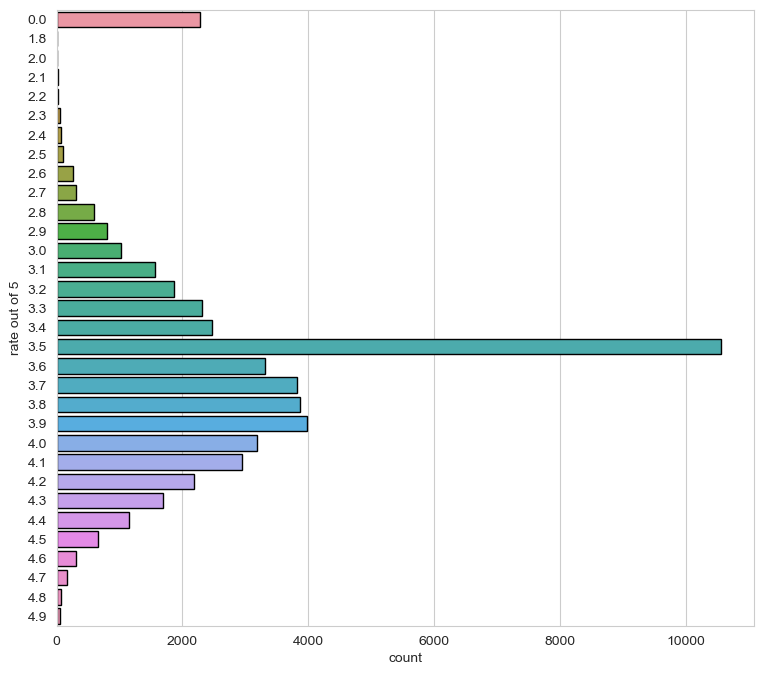

In [986]:
plt.figure(figsize=(9,8))
sns.countplot(y='rate out of 5',data=data, edgecolor='black')

<AxesSubplot:xlabel='rate out of 5', ylabel='votes'>

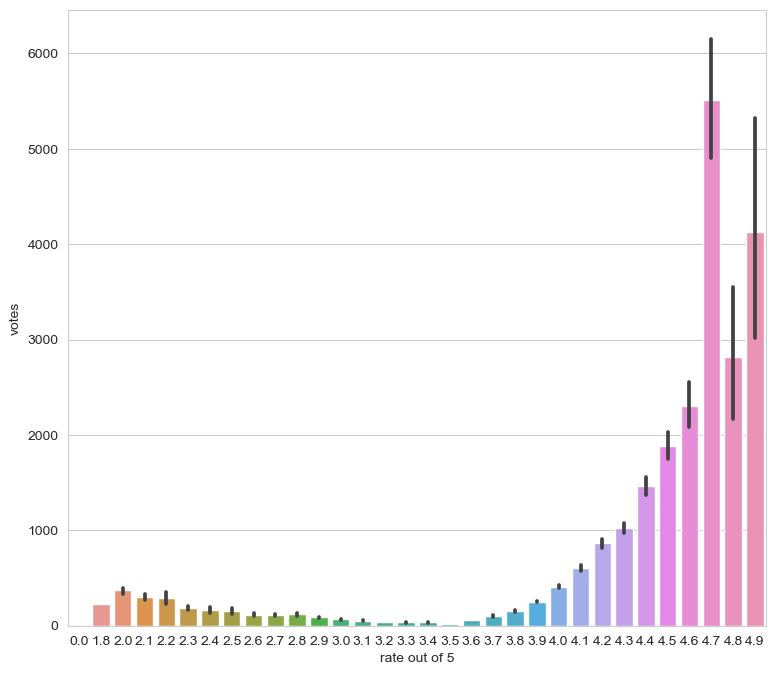

In [987]:
plt.figure(figsize=(9,8))
sns.barplot(x='rate out of 5',y='votes',data=data)

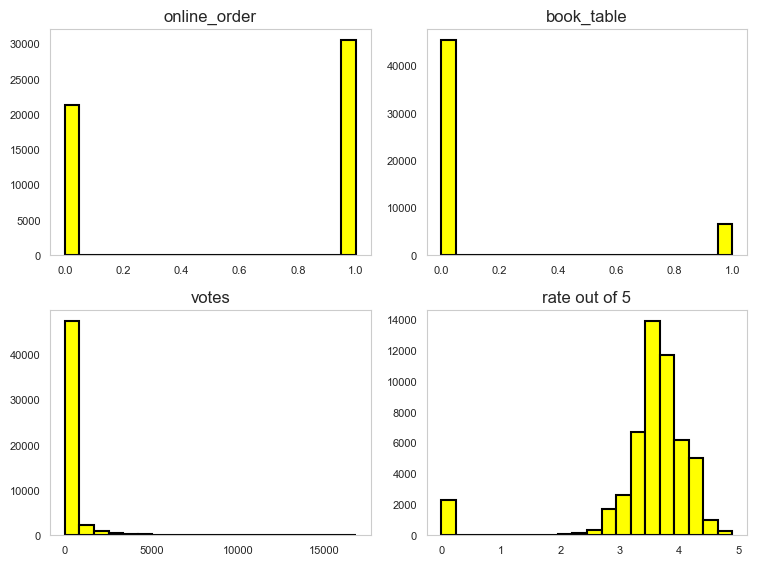

In [988]:
data.hist(bins=20, color='yellow',edgecolor='black',
             linewidth=1.5,xlabelsize=8,
             ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

## Find Which Is Highest Voted Restaurant 

In [989]:
df0=data.groupby('name')['votes'].max().nlargest(10)

Text(0.5, 0, 'Restaurnts Name')

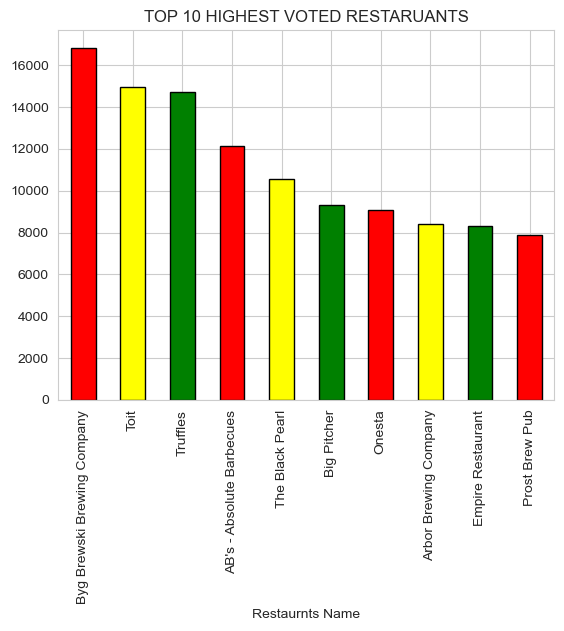

In [990]:
plt.title('TOP 10 HIGHEST VOTED RESTARUANTS')
df0.plot.bar(color=['red', 'yellow', 'green'], edgecolor='black')
plt.xlabel('Restaurnts Name') 

## Which is Famus Restarounts 

Text(0.5, 0, 'OUTLETS')

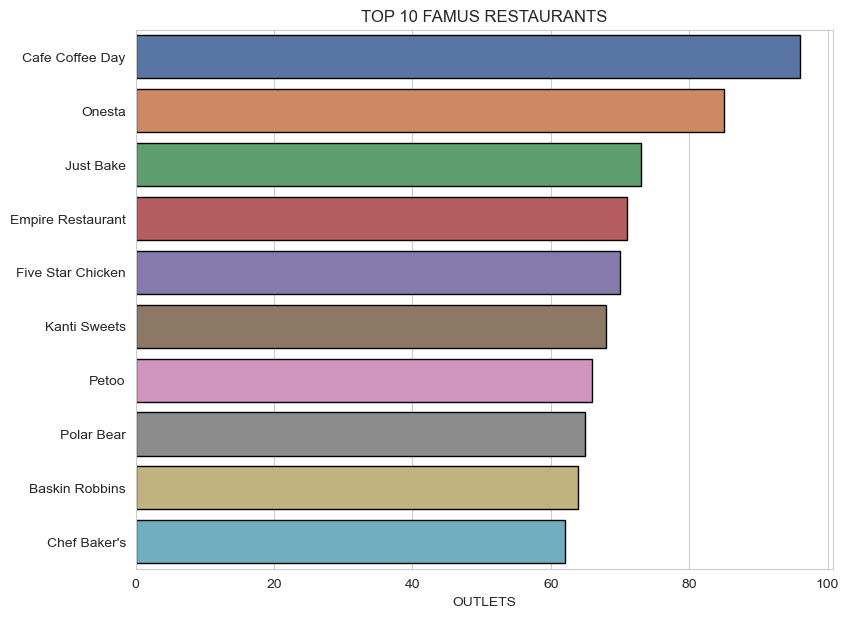

In [991]:
plt.figure(figsize=(9,7))
rest=data['name'].value_counts()[0:10]
sns.barplot(x=rest,y=rest.index,palette='deep', edgecolor='black') 
plt.title('TOP 10 FAMUS RESTAURANTS')
plt.xlabel('OUTLETS') 

## Find Out Which Restaurants Is Repeat In Different Locations 

In [992]:
data.groupby('name')['location'].unique()

name
1947                                            [Banashankari, Jayanagar, Malleshwaram, Rajaji...
#FeelTheROLL                                                                          [Bellandur]
#L-81 Cafe                                                                                  [HSR]
#Vibes Restro                                                                   [Electronic City]
#refuel                                                                       [Bannerghatta Road]
                                                                      ...                        
late100                                                                                     [BTM]
nu.tree                                              [Sarjapur Road, Whitefield, Electronic City]
re:cess - Hilton Bangalore Embassy GolfLinks                                             [Domlur]
repEAT Hub                                                                         [Marathahalli]
sCoolMeal      

In [993]:
restaurant=[] 
location=[]
for key,value in data.groupby('location'):
    location.append(key)
    restaurant.append(len(value['name'].unique()))

In [994]:
df7=pd.DataFrame(zip(location,restaurant)) 
df7.columns=['location','restaurant']
df7.set_index('location',inplace=True)
df7.sort_values(by='restaurant')

,restaurant
location,
Peenya,1
Jakkur,1
Kengeri,1
Langford Town,2
Rajarajeshwari Nagar,2
...,...
Marathahalli,659
HSR,684
Electronic City,696


In [995]:
df7.describe()

,restaurant
count,94.000000
mean,129.265957
std,178.182471
min,1.000000
25%,20.500000
50%,57.500000
75%,148.500000
max,824.000000


In [996]:
df=df7.groupby('location')['restaurant'].max().nlargest(10)

Text(0.5, 0, 'Rest_type')

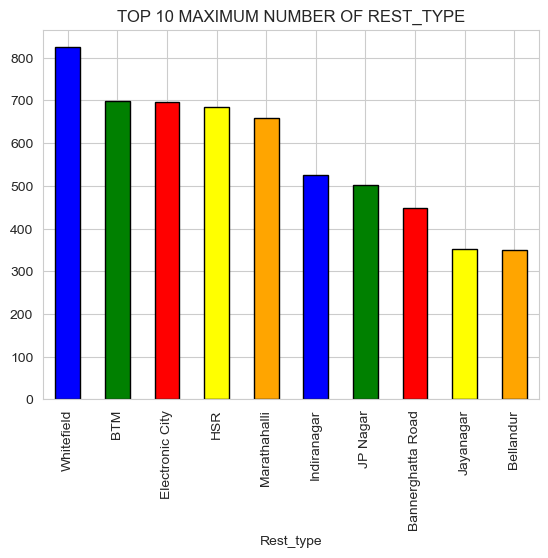

In [997]:
plt.title('TOP 10 MAXIMUM NUMBER OF REST_TYPE')
df.plot.bar(color=['blue', 'green', 'red', 'yellow', 'orange'], edgecolor='black')
plt.xlabel('Rest_type')

## Top 10 Rest Type

In [998]:
df1=data['rest_type'].value_counts().nlargest(10)

Text(0.5, 0, 'Rest type')

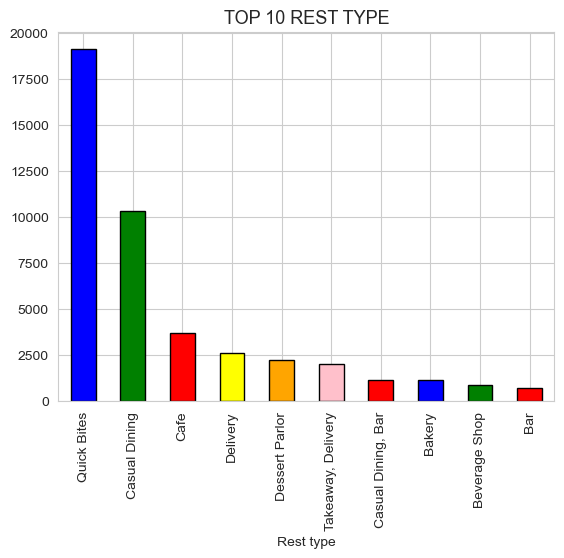

In [999]:
plt.title('TOP 10 REST TYPE', fontsize=13)
df1.plot.bar(color=['blue', 'green', 'red', 'yellow', 'orange', 'pink', 'red'], edgecolor='black')
plt.xlabel('Rest type')

Text(0, 0.5, 'votes')

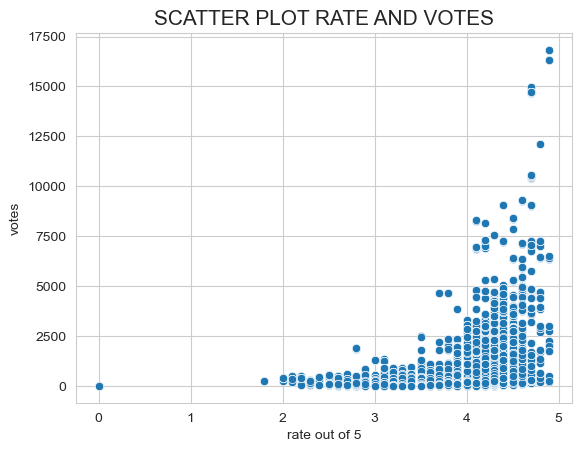

In [1000]:
plt.title('SCATTER PLOT RATE AND VOTES', fontsize=15)
sns.scatterplot(x='rate out of 5',y='votes',data=data)
plt.xlabel('rate out of 5')
plt.ylabel('votes')

## Find Out Most Popular Cusisines 

Text(0.5, 1.0, 'popular cuisines')

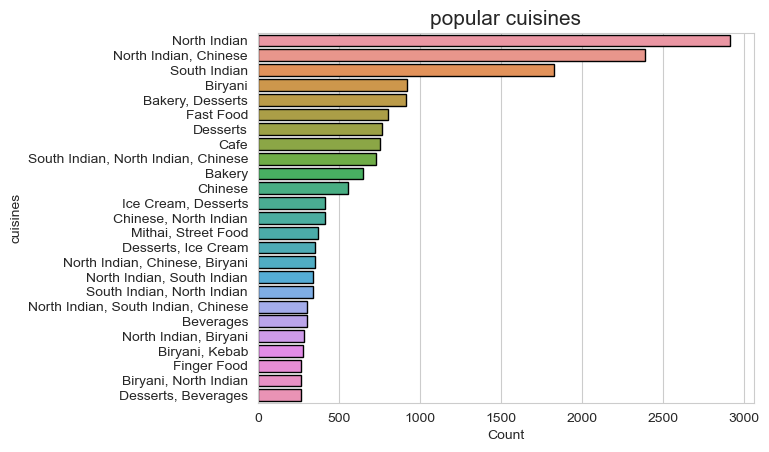

In [1001]:
cuisines=data['cuisines'].value_counts()[:25]
sns.barplot(cuisines,cuisines.index, edgecolor='black')
plt.xlabel('Count')
plt.ylabel('cuisines')
plt.title('popular cuisines', fontsize=15)

## 50% of the restaurants are affordable

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

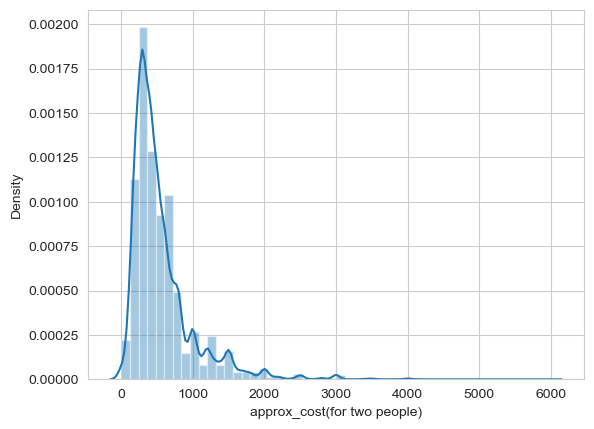

In [1002]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(int)
sns.distplot(data['approx_cost(for two people)']) 

## Find Most Expenssive Restaurants (for two people)

In [1003]:
data[data['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [1004]:
data[data['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [1005]:
df12=data[data['approx_cost(for two people)']>5000]['name'].value_counts()

Text(0.5, 0, 'Restaurants')

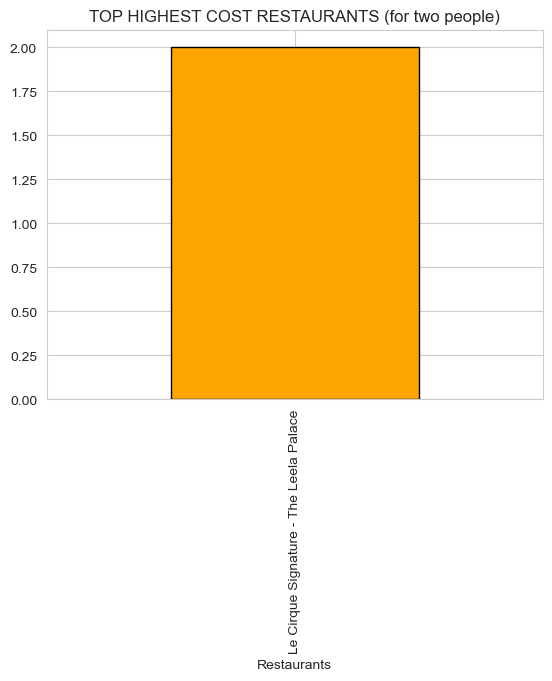

In [1006]:
plt.title('TOP HIGHEST COST RESTAURANTS (for two people)')
df12.plot.bar(color='orange',edgecolor='black')
plt.xlabel('Restaurants')

## Most Lowest Cost Restaurants (for two people)

In [1007]:
df15=data[data['approx_cost(for two people)']==40]['name'].value_counts()[:10]

Text(0.5, 0, 'Restaurants')

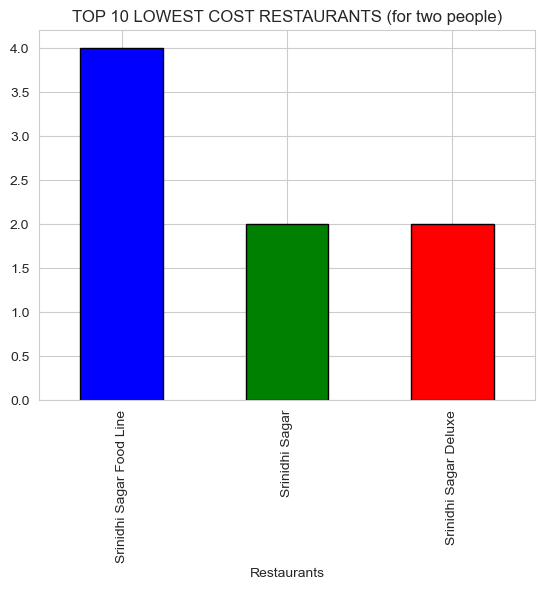

In [1008]:
plt.title('TOP 10 LOWEST COST RESTAURANTS (for two people)')
df15.plot.bar(color=['blue', 'green', 'red', 'yellow', 'orange'],edgecolor='black')
plt.xlabel('Restaurants')

## Relation Between Approx_cost(for two people) And Rating

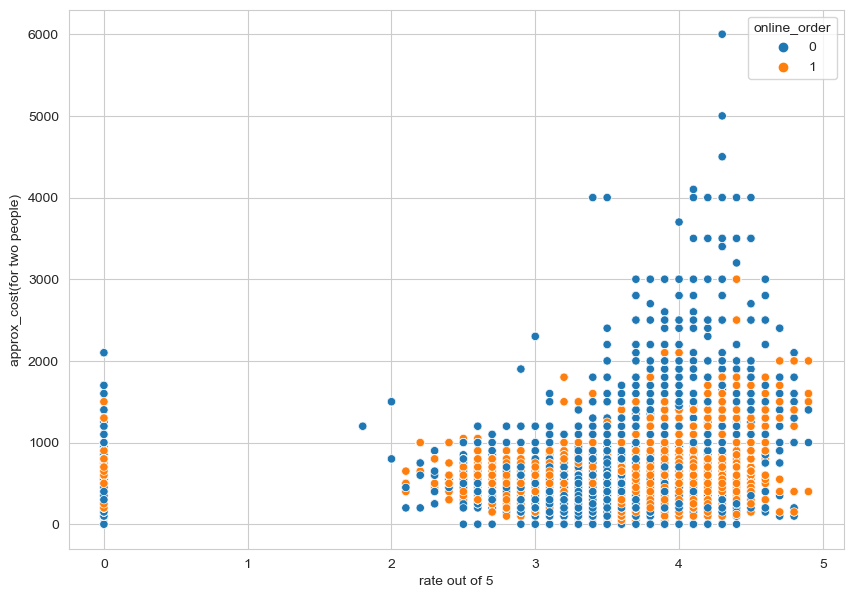

In [1009]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='rate out of 5',y='approx_cost(for two people)',hue='online_order',data=data)
plt.show()

## Check Location And Area 

In [1010]:
area=data['location'].value_counts()[:20]

Text(0.5, 1.0, 'MOST POPULAR FOODIE AREA')

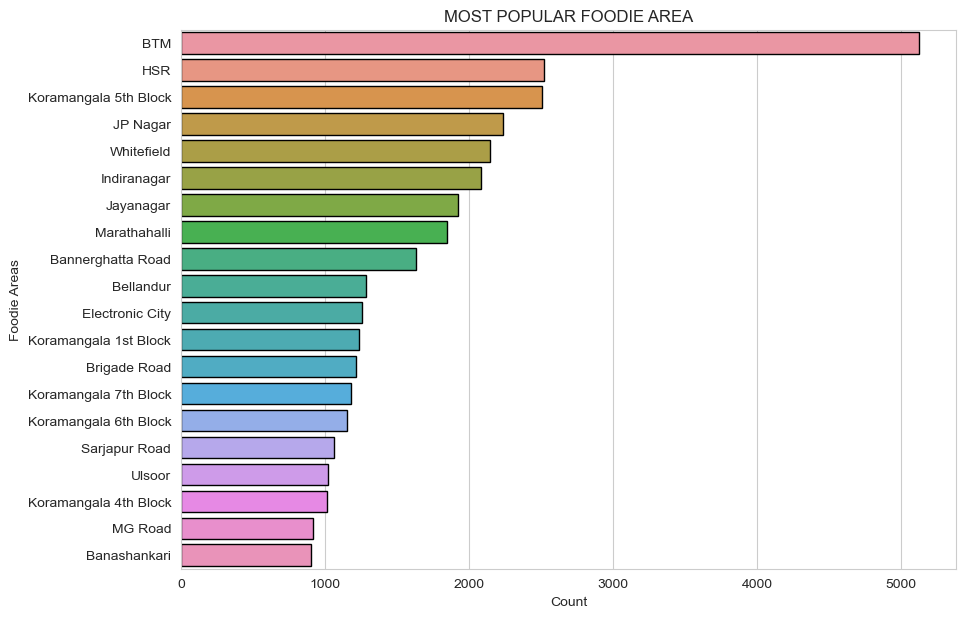

In [1011]:
plt.figure(figsize=(10,7))
sns.barplot(area,area.index, edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Foodie Areas')
plt.title('MOST POPULAR FOODIE AREA')

In [1012]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

Text(0.5, 0, 'Listed In Type')

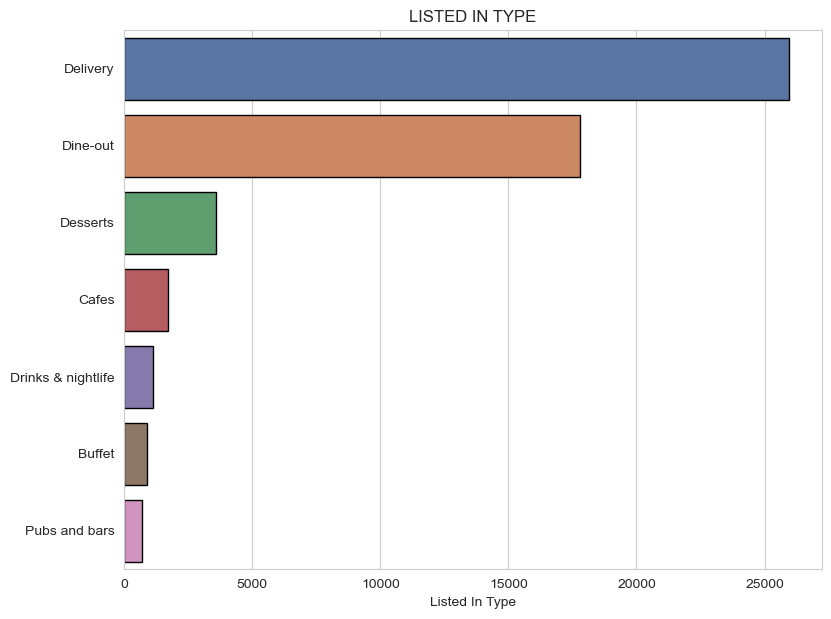

In [1013]:
plt.figure(figsize=(9,7))
res=data['listed_in(type)'].value_counts()
sns.barplot(x=res,y=res.index,palette='deep', edgecolor='black') 
plt.title('LISTED IN TYPE')
plt.xlabel('Listed In Type') 

Text(0, 0.5, 'Location')

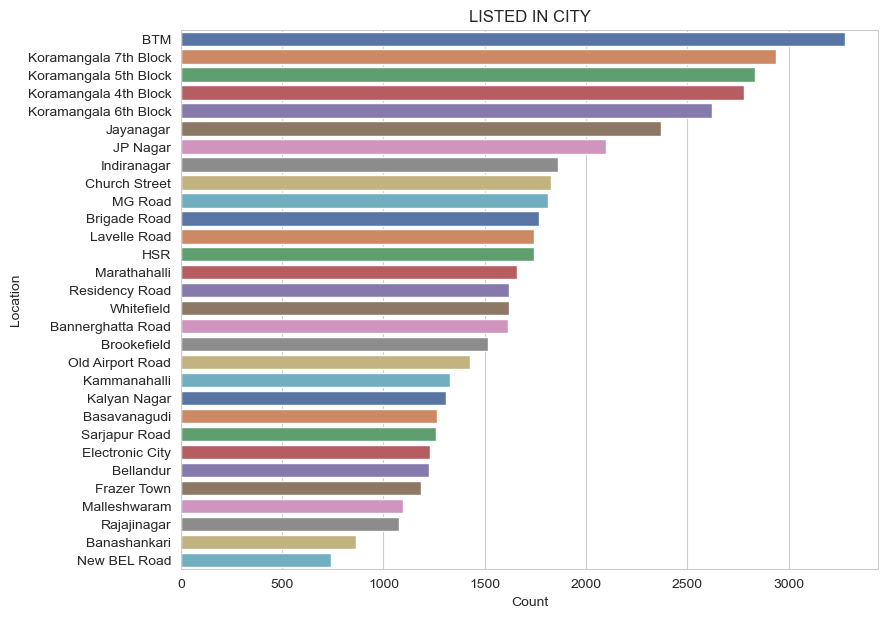

In [1014]:
plt.figure(figsize=(9,7))
res1=data['listed_in(city)'].value_counts()
sns.barplot(x=res1,y=res1.index,palette='deep') 
plt.title('LISTED IN CITY')
plt.xlabel('Count') 
plt.ylabel('Location') 

## Find Which Is Most Popular Rest_type 

In [1015]:
data.groupby('name')['rest_type'].unique()

name
1947                                                                              [Casual Dining]
#FeelTheROLL                                                                        [Quick Bites]
#L-81 Cafe                                                                          [Quick Bites]
#Vibes Restro                                                                     [Casual Dining]
#refuel                                                                                    [Cafe]
                                                                      ...                        
late100                                                                                [Delivery]
nu.tree                                         [Delivery, Quick Bites, Beverage Shop, Casual ...
re:cess - Hilton Bangalore Embassy GolfLinks                                 [Casual Dining, Bar]
repEAT Hub                                                                          [Quick Bites]
sCoolMeal      

In [1016]:
restaurant=[] 
location=[]
for key,value in data.groupby('rest_type'):
    location.append(key)
    restaurant.append(len(value['name'].unique()))

In [1017]:
df8=pd.DataFrame(zip(location,restaurant)) 
df8.columns=['location','rest']
df8.set_index('location',inplace=True)
df8.sort_values(by='rest')

,rest
location,
"Quick Bites, Meat Shop",1
"Lounge, Microbrewery",1
"Cafe, Bar",1
"Cafe, Food Court",1
"Cafe, Lounge",1
...,...
Cafe,429
Delivery,555
"Takeaway, Delivery",577


In [1018]:
df8.describe()

,rest
count,94.000000
mean,101.627660
std,458.731162
min,1.000000
25%,1.000000
50%,7.500000
75%,26.750000
max,4051.000000


In [1019]:
df=df8.groupby('location')['rest'].max().nlargest(20)

<AxesSubplot:title={'center':'MOST POPULAR REST_TYPE'}, xlabel='location'>

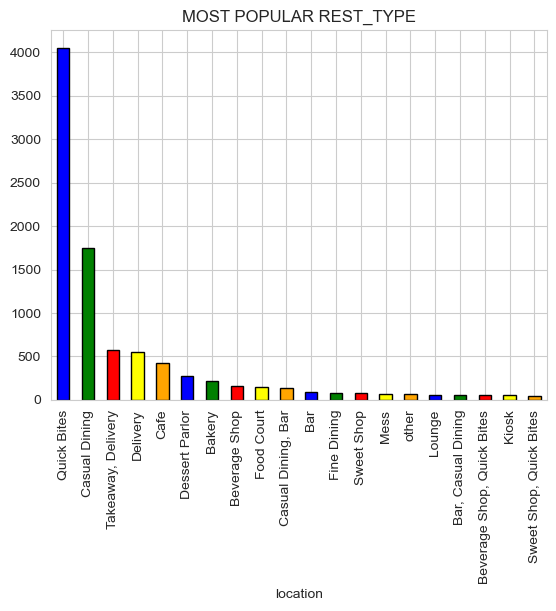

In [1020]:
plt.title('MOST POPULAR REST_TYPE')
df.plot.bar(color=['blue', 'green', 'red', 'yellow', 'orange'], edgecolor='black')

## Find Locations Which is High Voted 

In [1021]:
df9=data[['votes', 'location']].value_counts().nlargest(10)

In [1022]:
df9

votes  location             
0      BTM                      1189
       Whitefield                563
       JP Nagar                  514
       HSR                       504
       Electronic City           418
       Marathahalli              403
       Bannerghatta Road         394
       Koramangala 1st Block     385
       Bellandur                 274
       Jayanagar                 271
dtype: int64

Text(0.5, 0, 'Location Name')

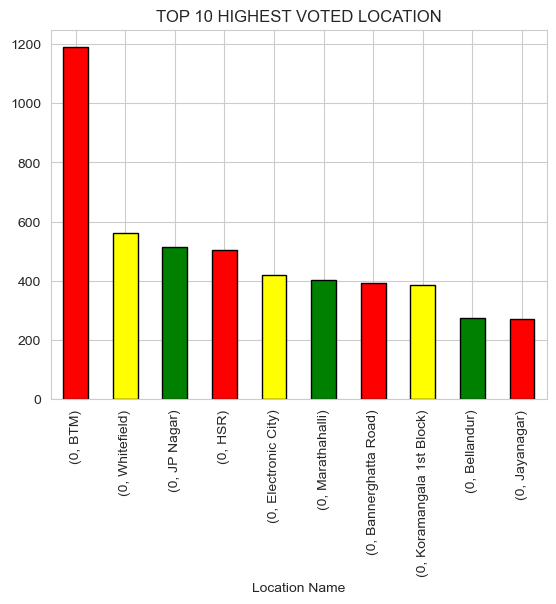

In [1023]:
plt.title('TOP 10 HIGHEST VOTED LOCATION')
df9.plot.bar(color=['red', 'yellow', 'green'], edgecolor='black')
plt.xlabel('Location Name') 

##  Rate Vs Votes

In [1024]:
df10=data[['votes', 'rate out of 5']].value_counts().nlargest(10)

In [1025]:
df10

votes  rate out of 5
0      3.5              7731
       0.0              2277
4      3.3               486
       3.2               438
6      3.3               293
       3.4               269
7      3.4               246
5      3.3               237
11     3.5               222
9      3.4               185
dtype: int64

Text(0.5, 1.0, 'RATES VS VOTES')

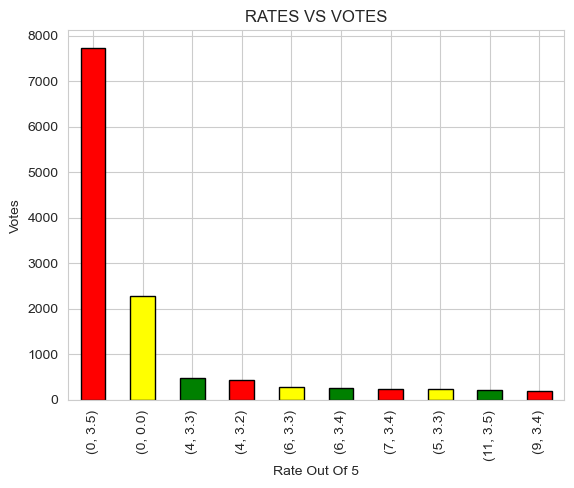

In [1026]:
df10.plot.bar(color=['red', 'yellow', 'green'], edgecolor='black')
plt.xlabel('Rate Out Of 5') 
plt.ylabel('Votes')
plt.title('RATES VS VOTES')

Text(0, 0.5, 'Votes')

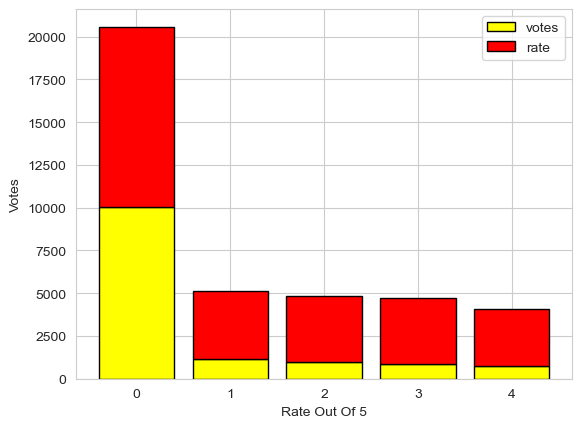

In [1027]:
n = np.arange(5)
plt.bar(n,data['votes'].value_counts().nlargest(),color='yellow', edgecolor='black')
plt.bar(n,data['rate out of 5'].value_counts().nlargest(),color='red', edgecolor='black', bottom=data['votes'].value_counts().nlargest())
plt.legend(['votes','rate'],loc='upper right')
plt.xlabel('Rate Out Of 5')
plt.ylabel('Votes')

In [1028]:
data

,address,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate out of 5
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,27,Whitefield,Bar,other,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,0,Whitefield,Bar,other,Finger Food,600,[],[],Pubs and bars,Whitefield,3.5
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,0,Whitefield,Bar,other,Finger Food,2000,[],[],Pubs and bars,Whitefield,3.5
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3
